In [31]:
#Data is from Kaggle: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

About this dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

SyntaxError: invalid syntax (1578631658.py, line 3)

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
Heart_Attack_Data = pd.read_csv('/Users/pri/Downloads/heart.csv')
Heart_Attack_Data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
#checking for nulls/NAN/missing vals
Heart_Attack_Data.info()

#Appears to be no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [35]:
#checking for duplicates
Heart_Attack_Data.duplicated().sum()

#it is a really insignificant amount, therefore I will not remove it. There is a high possibility of an individual with the same age and or similar health characteristics

1

In [36]:
#getting the statistical overview of my data
Heart_Attack_Data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [45]:
#preprocessing 
x = Heart_Attack_Data.iloc[:, :-1].values 
y = Heart_Attack_Data.iloc[:, -1].values 

In [48]:
print(x)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [49]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [50]:
#train test splitting my data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [51]:
#scaling data
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
x_train = SC.fit_transform(X_train)
x_test = SC.fit_transform(X_test)

In [52]:
print(x_train)

[[ 0.26745345  0.71647284 -0.0127744  ...  0.97351831  0.30327986
  -0.53044521]
 [ 0.4831264   0.71647284  0.95382211 ... -0.6634347   0.30327986
  -2.20282109]
 [ 1.34581817  0.71647284 -0.97937092 ... -0.6634347   1.30102663
   1.14193067]
 ...
 [ 1.56149112  0.71647284  1.92041862 ... -0.6634347   0.30327986
  -0.53044521]
 [-0.91874774  0.71647284 -0.97937092 ...  0.97351831 -0.69446692
   1.14193067]
 [ 0.91447229 -1.39572632 -0.0127744  ...  0.97351831  1.30102663
  -0.53044521]]


In [53]:
print(x_test)

[[ 0.36790903  0.57735027 -0.82474581  0.76441498  0.63515684 -0.51639778
  -0.89973541 -1.57537146  1.34715063 -0.36245802 -0.60800521  0.16007959
  -2.00625306]
 [ 0.60587571  0.57735027  2.16004856  1.85952408  0.89445094 -0.51639778
  -0.89973541  0.40186918 -0.74230749 -0.66768583 -0.60800521 -0.7757703
   1.07405467]
 [ 0.36790903  0.57735027  1.1651171   0.76441498 -2.60601949  1.93649167
   1.11143786  0.99083447 -0.74230749 -0.66768583  0.98538775  0.16007959
   1.07405467]
 [ 0.24892568 -1.73205081 -0.82474581 -0.11167231  3.50899985 -0.51639778
  -0.89973541  0.02324863  1.34715063  0.62953235 -0.60800521  1.09592947
   1.07405467]
 [ 2.03367585 -1.73205081  1.1651171  -1.42580324  0.39747057  1.93649167
  -0.89973541 -0.81813037 -0.74230749 -0.82029973  0.98538775  0.16007959
  -0.4660992 ]
 [ 0.36790903  0.57735027  1.1651171   0.76441498 -1.69849012 -0.51639778
   1.11143786  1.03290342 -0.74230749  0.4006115   0.98538775 -0.7757703
  -0.4660992 ]
 [-0.94090776 -1.7320508

In [54]:
#Score with Logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/pri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
#predicting test data
ypred1 = lr.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

lr_confusion_matrix = confusion_matrix(y_test, ypred1)
lr_accuracy = accuracy_score(y_test, ypred1)

print("Confusion Matrix:", lr_confusion_matrix)
print("Accuracy Score:", lr_accuracy)

Confusion Matrix: [[29  6]
 [ 4 37]]
Accuracy Score: 0.868421052631579


In [ ]:
#confusion matrix results 
#29 = true positive
#6 = false positive
#4 = false negative
#37 = True negative

#Accuracy score is 86% which indicates it is 86 percent accurate.

In [64]:
#using KNN

from sklearn.neighbors import KNeighborsClassifier
knn_mod = KNeighborsClassifier(n_neighbors=5)
knn_mod.fit(x_train, y_train)

ypred2 = knn_mod.predict(x_test)

knn_confusion_matrix = confusion_matrix(y_test, ypred2)
knn_accuracy = accuracy_score(y_test, ypred2)

print("Confusion Matrix:", knn_confusion_matrix)
print("Accuracy Score:", knn_accuracy*100)

Confusion Matrix: [[31  4]
 [ 4 37]]
Accuracy Score: 89.47368421052632


In [63]:
#confusion matrix results
#31 true +
#4 false +
#4 false -
#37 true -

#accuracy score of 89% 

In [70]:
#over view of the scores

models = pd.DataFrame({'Model' : ['Logistic Regression', 'K-Nearest Neighbors'],
    'Score' : [lr_accuracy, knn_accuracy]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,K-Nearest Neighbors,0.894737
0,Logistic Regression,0.868421


In [ ]:
# KNN model gives the highest score of 89% therefore considered to be optimal.

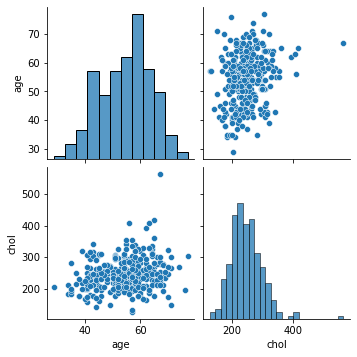

In [73]:
#visualizations
#high correlation with age and cholesterol levels
sns.pairplot(Heart_Attack_Data[["age", "chol"]])
plt.show()

Text(0.5, 1.0, 'Cholesterol Levels Based On Age')

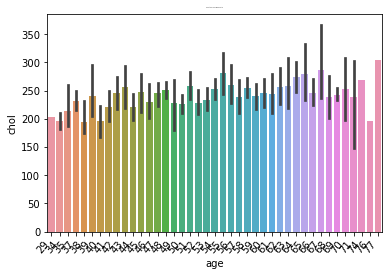

In [80]:
sns.barplot(data=Heart_Attack_Data, x='age', y = 'chol')
plt.xticks(rotation = 50, ha = 'right')
plt.title('Cholesterol Levels Based On Age', fontsize = 1)

#77 year olds have a high level of cholesterol